In [20]:
import os
import re
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import imfilter
%matplotlib inline
plt.show()
IMG_W = 256
IMG_H = 256

In [21]:
def assemble_masks(temp):
    '''
    overlap these images into one image
    :param temp: a bounch of images in url
    :return: the overlaped image in url
    '''
    image = Image.open(temp[0]).resize((IMG_W,IMG_H))
    for i in temp:
        img = Image.open(i)
        img = img.resize((IMG_W,IMG_H))
        image = np.array(image) | np.array(img)

    return image.reshape((IMG_W, IMG_H, 1))

In [28]:
def map_masks_to_images(images, labels):
    '''

    :param images: images, ndarray, e.g.(500,256,256,4)
    :param labels: masks, ndarray, e.g.(500,256,256,1)
    :return:
    images with contour, e.g.(500,256,256,4)

    '''
    num_imgs = images.shape[0]
    contour_images = []
    contour_labels = []
    contours = []
    for i in range(0, num_imgs):
        image = images[i]
        label = labels[i]
        contour = imfilter(label.reshape(label.shape[0], label.shape[1]), "find_edges")
        contour = contour.reshape((contour.shape[0], contour.shape[1], 1))
        contour_images.append(image | contour)
        contour_labels.append(label | contour)
        contours.append(contour)

    return contour_images, contour_labels, contours

In [29]:
def plot_images(images, labels, contour_images, contours, index = -1):
    if index == -1:
        index = np.random.randint(images.shape[0])
    image = images[index]
    label = labels[index].reshape(IMG_W, IMG_H)
    contour_image = contour_images[index]
    contour = contours[index].reshape(IMG_W, IMG_H)
    imgs = [image,label,contour_image,contour]
    titles = ['image','label','contour image', 'contour']
    # fig, axes = plt.subplot(2,2)
    for i in range(0, len(imgs)):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        plt.subplots_adjust(top = 0.96, bottom = 0.02, left = 0.1, right = 0.9, hspace = 0.1, wspace = 0)
        plt.imshow(imgs[i])
    plt.show()

In [30]:
def read_files(file_dir):
    '''
    Args:
        file_dir: root file directory
    Returns:
        list of training images, in ndarray, e.g. (560,256,256,4)
        list of training labels, in ndarray, e.g. (560,256,256,1)
    '''
    images = []
    temp = []
    labels = []
    for root, dirs, files in os.walk(file_dir):
        parent_dir_name = re.split(r'/',root)[-1]
        # image directories
        for file in files:
            temp.append(os.path.join(root, file))

        if parent_dir_name == 'masks':
            labels.append(assemble_masks(temp))
            temp.clear()
        elif parent_dir_name == 'images':
            img = Image.open(os.path.join(root, file))
            # img = img.convert("L")
            img = img.resize((IMG_W,IMG_H))
            images.append(np.array(img))
            temp.clear()

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [31]:
file_dir = '/root/dataset/dataScienceBowl2018/stage1_train'
images, labels = read_files(file_dir)
contour_images, contour_labels, contours = map_masks_to_images(images, labels)

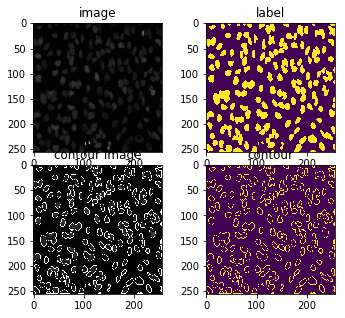

In [32]:
plot_images(images, labels, contour_images, contours)